## <span style="font-family: Georgia; font-weight:bold;font-size:1.5em;">Vehicle Recognition</span>

### Import packages

In [3]:
import pandas  as pd
import numpy as np

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore

from sklearn import svm

#Confusion Matrix
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Used for Styling
class color:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### Read Data and understand each attribute

Here the target variable is class and class attribute is the categorical type


class - van,bus or car

In [5]:
data=pd.read_csv("vehicle.csv",delimiter=',')
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [6]:
print("The DataSet has {} rows and  {} columns".format(data.shape[0],data.shape[1]))

The DataSet has 846 rows and  19 columns


In [7]:
print(color.UNDERLINE+'The information of the data set:::'+color.END)
data.info()

The information of the data set:::
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null  

In [8]:
data.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

For this missing values in the next sections we'll use the Imputer to replace them with the median value. We'll see in details in that section

In [9]:
print(color.UNDERLINE+'Checking if any columns are null :::'+color.END)
print(data.isnull().values.any())
print('\n')
print(color.UNDERLINE+'Total null values:::'+color.END)
print(data.isnull().sum().sum())

Checking if any columns are null :::
True


Total null values:::
41


In [10]:
dupes = data.duplicated()
print(color.UNDERLINE+color.BOLD+'Duplicates in the DataSet::'+color.END,sum(dupes))
data[data.duplicated()]

Duplicates in the DataSet:: 0


Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

The outliers can be handle in any one of the below methods:
1.Replace with Median
2.Capping -  Get the median and standard deviation of every group and adjust outliers accorrdingly or we can also adjust to IQR Values
3.Based Upon the assumptions also we can adjust these Outliers


In the next sections we'll handle these Outliers using any one of the above method

Outliers in the DataSet::


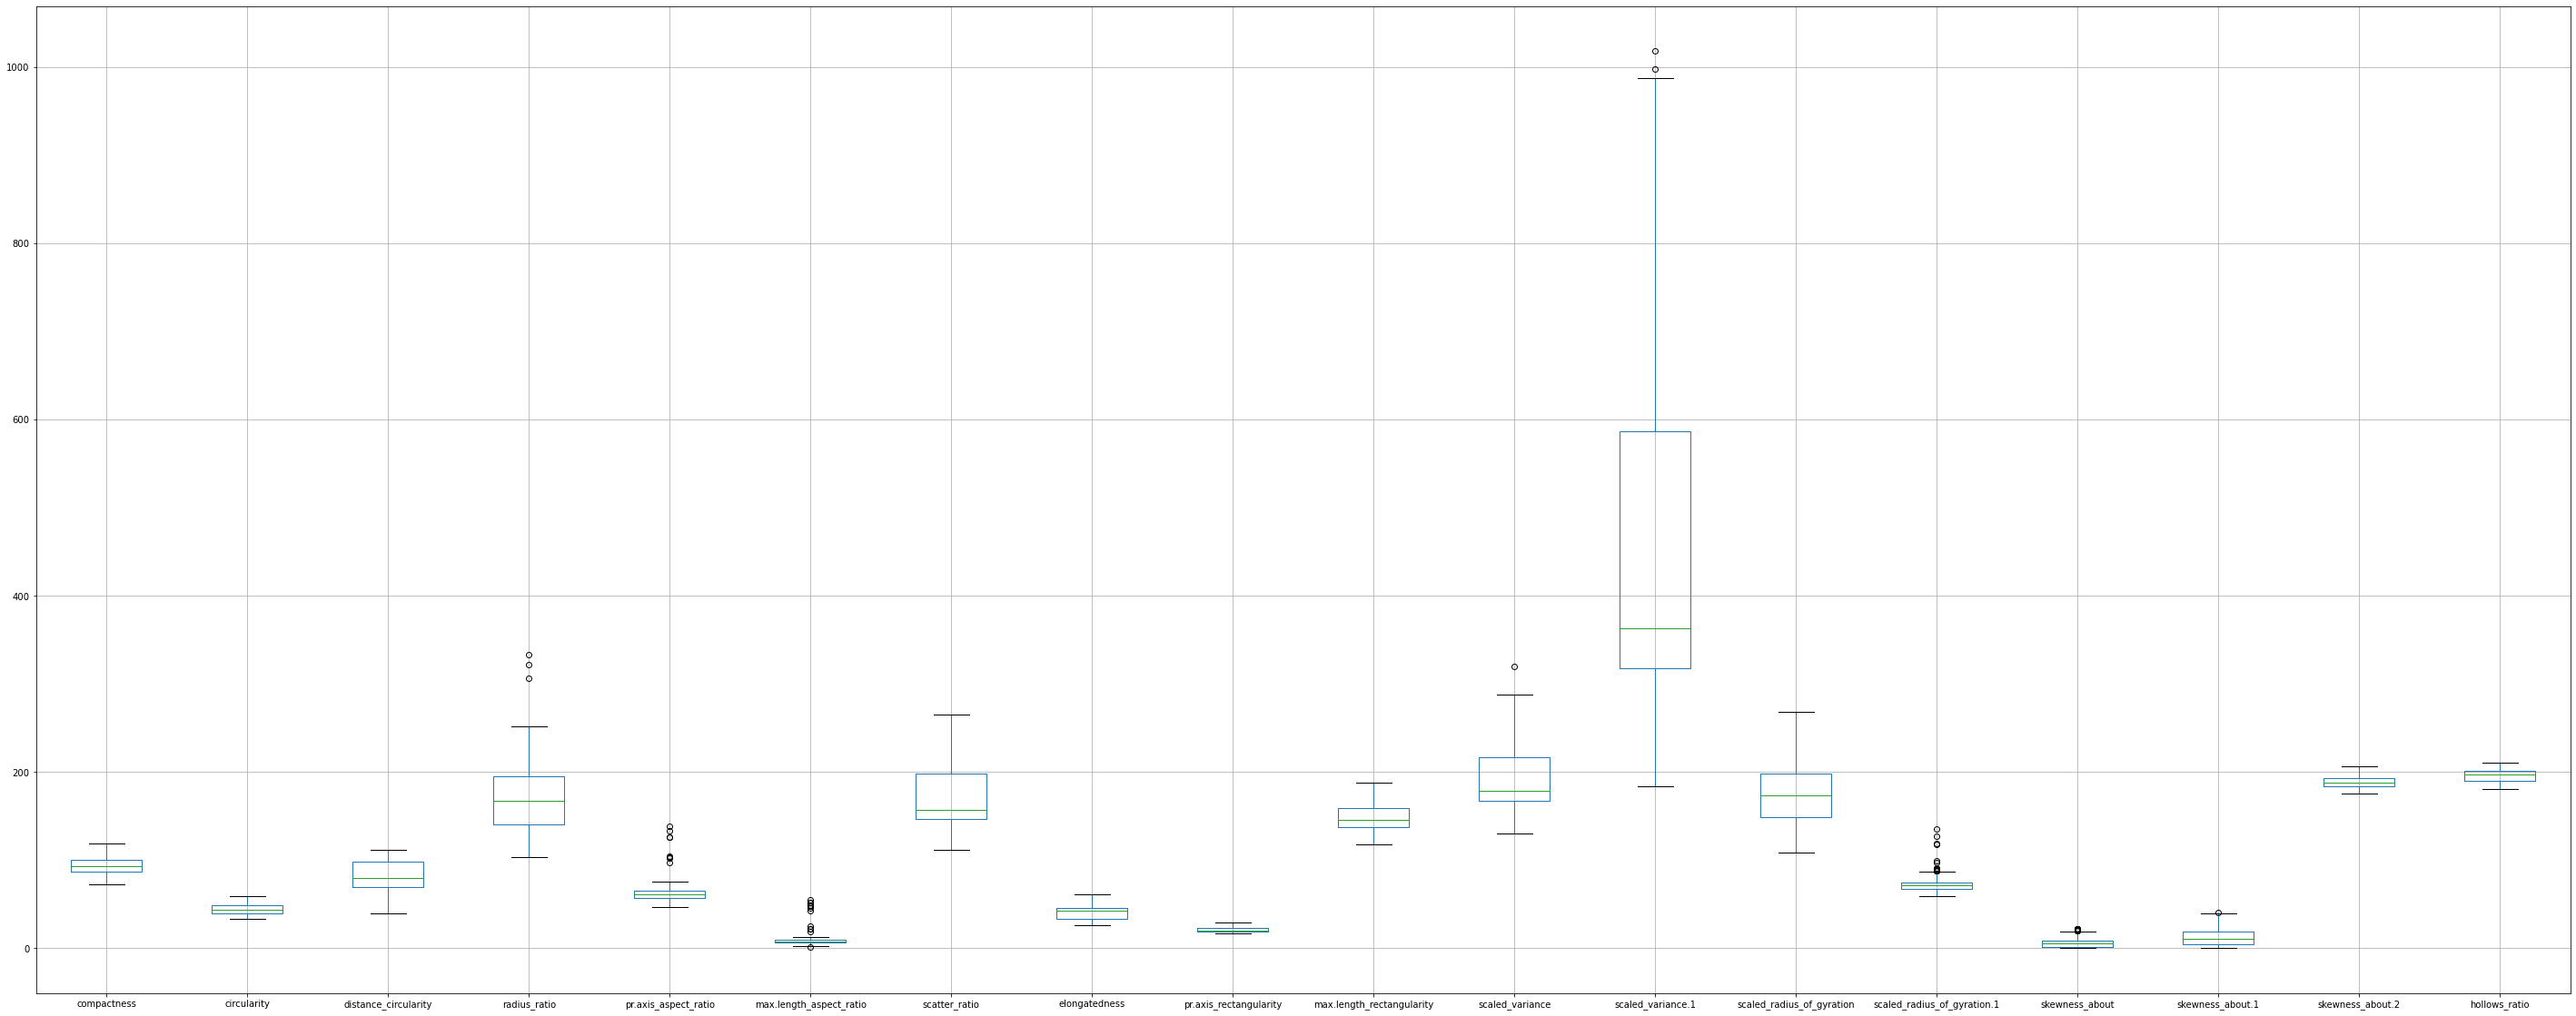

In [11]:
#Outliers
print(color.UNDERLINE+color.BOLD+'Outliers in the DataSet::'+color.END)
data.boxplot(return_type='axes',figsize=(50,20))

### Understanding the attributes

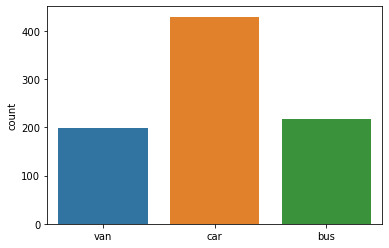

In [12]:
#Target Variable
sns.countplot(data['class'].values)

Changing class attribute from categorical to numerical

van=0
bus=1
car=2

In [13]:
replace_class={"class": {"van":0,"bus":1,"car":2}}
data = data.replace(replace_class)
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      0  
1             189.0            199      0  
2             188.0            196      2  
3             199.0            207      0  
4             180.0            183      1

In [14]:
n_van = len(data.loc[data['class'] == 0])
n_bus = len(data.loc[data['class'] == 1])
n_car = len(data.loc[data['class'] == 2])
print("Number of vans in the given dataset: {0} ({1:2.2f}%)".format(n_van, (n_van / (n_van + n_bus+ n_car)) * 100 ))
print("Number of bus in the given dataset: {0} ({1:2.2f}%)".format(n_bus, (n_bus / (n_van + n_bus+ n_car)) * 100 ))
print("Number of cars in the given dataset: {0} ({1:2.2f}%)".format(n_car, (n_car / (n_van + n_bus+ n_car)) * 100 ))


Number of vans in the given dataset: 199 (23.52%)
Number of bus in the given dataset: 218 (25.77%)
Number of cars in the given dataset: 429 (50.71%)


So we can say that the Target Variable which we are dealing is balanced

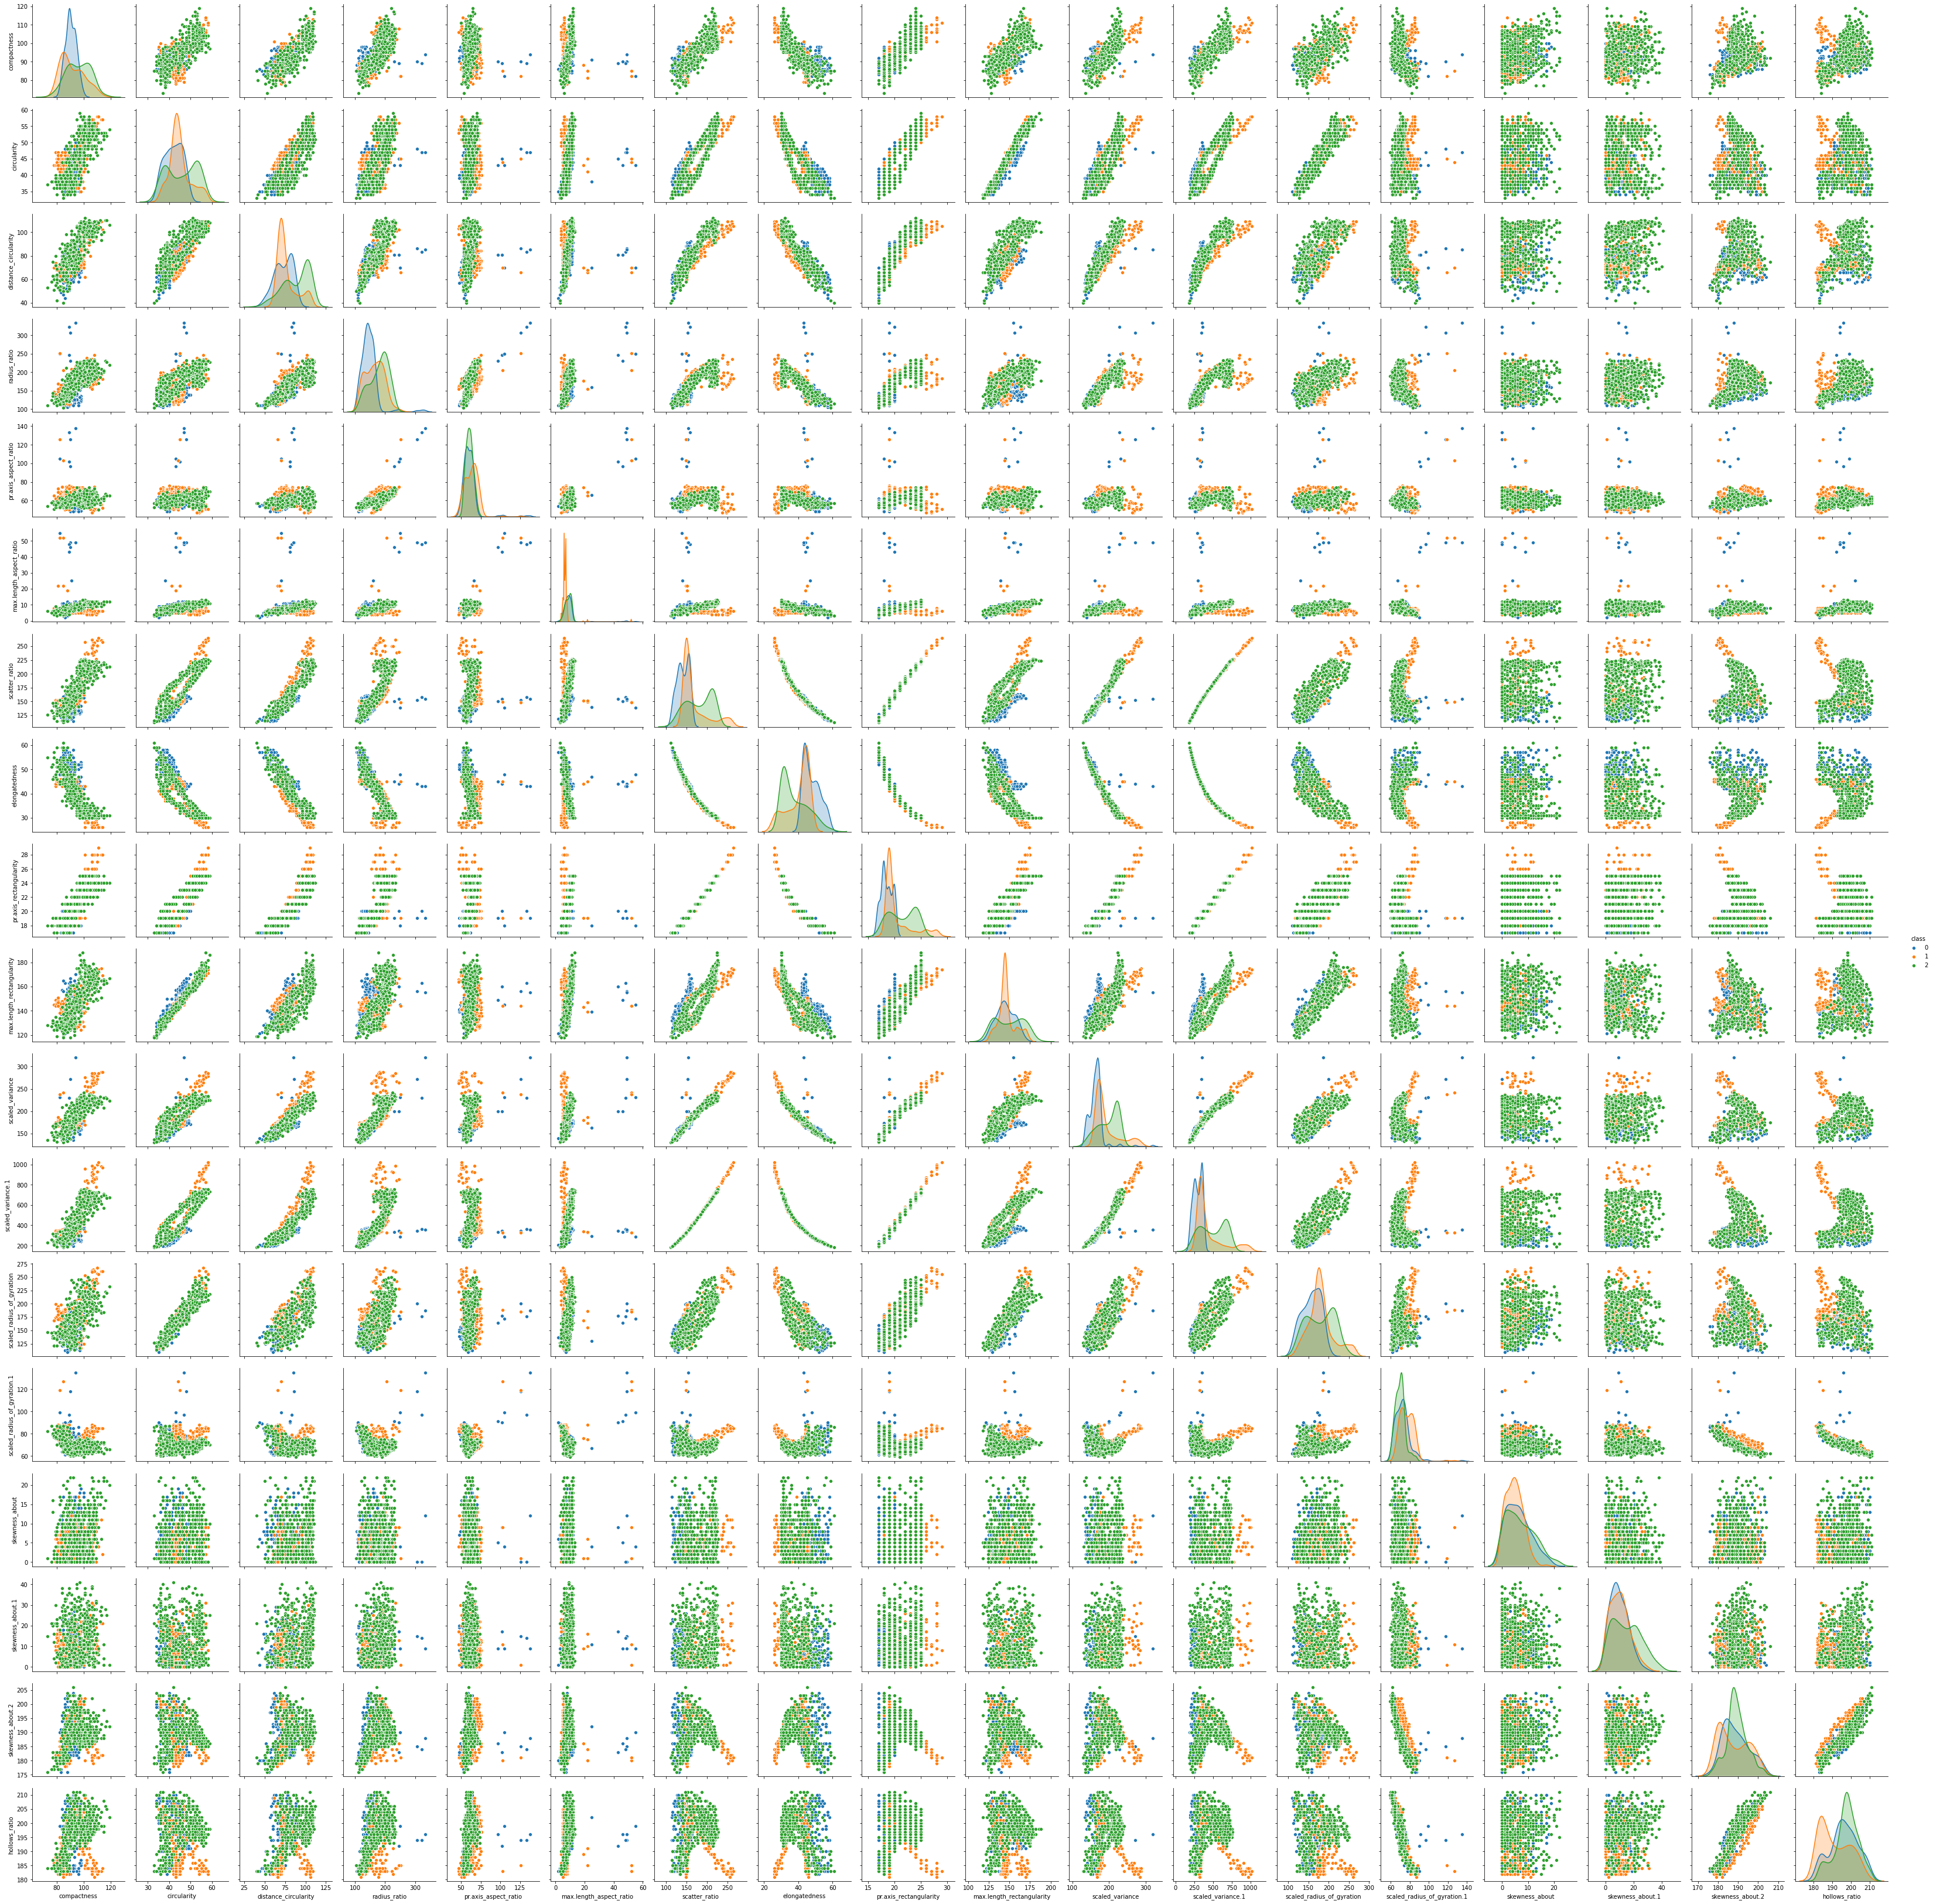

In [15]:
sns.pairplot(data, hue='class',diag_kind='kde')

In [16]:
data.skew()

compactness                    0.381271
circularity                    0.261809
distance_circularity           0.106585
radius_ratio                   0.394978
pr.axis_aspect_ratio           3.830362
max.length_aspect_ratio        6.778394
scatter_ratio                  0.607271
elongatedness                  0.047847
pr.axis_rectangularity         0.770889
max.length_rectangularity      0.256359
scaled_variance                0.651598
scaled_variance.1              0.842034
scaled_radius_of_gyration      0.279317
scaled_radius_of_gyration.1    2.083496
skewness_about                 0.776519
skewness_about.1               0.688017
skewness_about.2               0.249321
hollows_ratio                 -0.226341
class                         -0.537826
dtype: float64

#### Observation:

1.compactness:  
  a.For Compactness distribution to itself - we can see tails for car and bus  - so there are more outliers in these two classes  
  b.It has positive correlation with circularity,distance_circularity,radius_ratio,scatter_ratio
  c.Even we see positive correlation with scatter ratio - we can guess they are some outliers 
  
2.circularity - We can see the tail for van and car  

Similar cases in other attributes also we can see tails  so they are outliers 
we can also see that there is strong correlation between few attributes - example mostly we see the strong relation between scatter_ratio and other attributes 
In some correlation we can see that the range of the car and bus was almost similar  ex:Scatter_ratio and max_length_aspect_ratio
In most attributes we can observe that car and bus distributed over van


Here in the same pair plot we can see both the univariate and bivariate distribution of each attribute. So not including separate histogram distribution for each attribute

#### Correlation and skewness

In [17]:
data.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.689786              0.791707   
circularity                     0.689786     1.000000              0.797180   
distance_circularity            0.791707     0.797180              1.000000   
radius_ratio                    0.691081     0.625051              0.771748   
pr.axis_aspect_ratio            0.091779     0.154283              0.158684   
max.length_aspect_ratio         0.148249     0.251407              0.264621   
scatter_ratio                   0.812770     0.858265              0.907949   
elongatedness                  -0.788736    -0.827246             -0.913020   
pr.axis_rectangularity          0.814248     0.856603              0.896273   
max.length_rectangularity       0.676143     0.965729              0.775149   
scaled_variance                 0.764361     0.806791              0.865710   
scaled_variance.1               0.818674     0.850863              0.890541   
scaled_radius_of_gyration       0.585845     0.935950              0.706950   
scaled_radius_of_gyration.1    -0.250603     0.053080             -0.227001   
skewness_about                  0.236685     0.144968              0.114665   
skewness_about.1                0.157670    -0.011869              0.266049   
skewness_about.2                0.298528    -0.106339              0.146027   
hollows_ratio                   0.365552     0.045652              0.333648   
class                           0.297774     0.251408              0.428836   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.691081              0.091779   
circularity                      0.625051              0.154283   
distance_circularity             0.771748              0.158684   
radius_ratio                     1.000000              0.665363   
pr.axis_aspect_ratio             0.665363              1.000000   
max.length_aspect_ratio          0.450486              0.648861   
scatter_ratio                    0.738480              0.103832   
elongatedness                   -0.792946             -0.183492   
pr.axis_rectangularity           0.712744              0.079566   
max.length_rectangularity        0.571083              0.127322   
scaled_variance                  0.798294              0.273738   
scaled_variance.1                0.725598              0.089750   
scaled_radius_of_gyration        0.541325              0.122454   
scaled_radius_of_gyration.1     -0.181520              0.152860   
skewness_about                   0.049112             -0.058539   
skewness_about.1                 0.174469             -0.032180   
skewness_about.2                 0.382912              0.240201   
hollows_ratio                    0.472339              0.267760   
class                            0.403329             -0.038650   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812770   
circularity                                 0.251407       0.858265   
distance_circularity                        0.264621       0.907949   
radius_ratio                                0.450486       0.738480   
pr.axis_aspect_ratio                        0.648861       0.103832   
max.length_aspect_ratio                     1.000000       0.165998   
scatter_ratio                               0.165998       1.000000   
elongatedness                              -0.180053      -0.973504   
pr.axis_rectangularity                      0.161603       0.992078   
max.length_rectangularity                   0.305943       0.810017   
scaled_variance                             0.319033       0.951672   
scaled_variance.1                           0.143745       0.996328   
scaled_radius_of_gyration                   0.189752       0.800577   
scaled_radius_of_gyration.1                 0.295638      -0.028006   
skewness_about                            

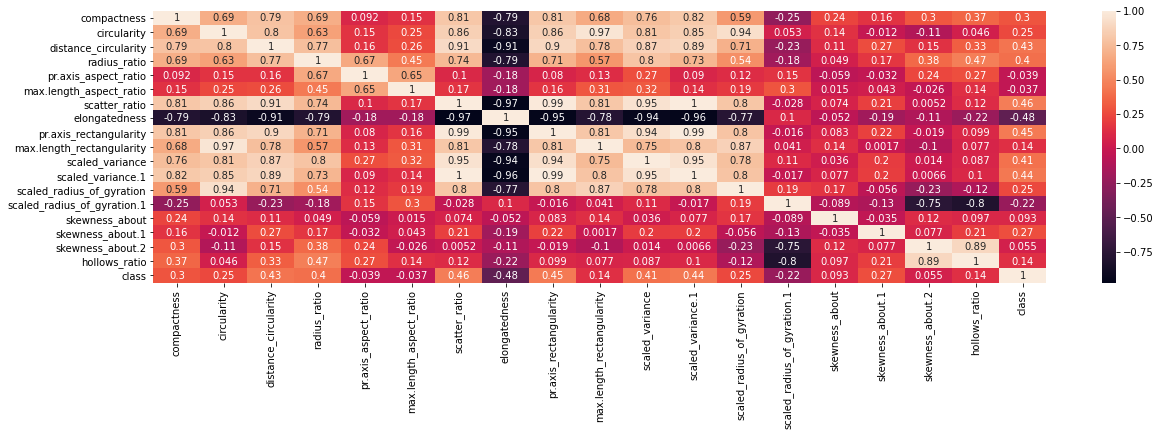

In [18]:
#find the correlation between independent variables
plt.figure(figsize=(20,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

#### Observation:

We can see strong correlation between (nearly equal to 1) 
   a. pr.axis_rectangularity and scatter_ratio,scaled_variance_1  - Strong Positive Correlation
   b. Elongatedness and scatter_ratio - Negative Strong Correlation
   

#### Handling Missing,Outliers and Null values

In [19]:
data_withoutNull=data.copy()

##### Handling Outliers

Here mostly the outliers effect is on  
1. radius_ratio
2. pr.axis_aspect_ratio
3. max_length_aspect_ratio
4. scaled_radius_of_gyration.1

Now we are going to remove outliers by adjusting to IQR Level

F:\PGP-AIML\Python_Projects\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


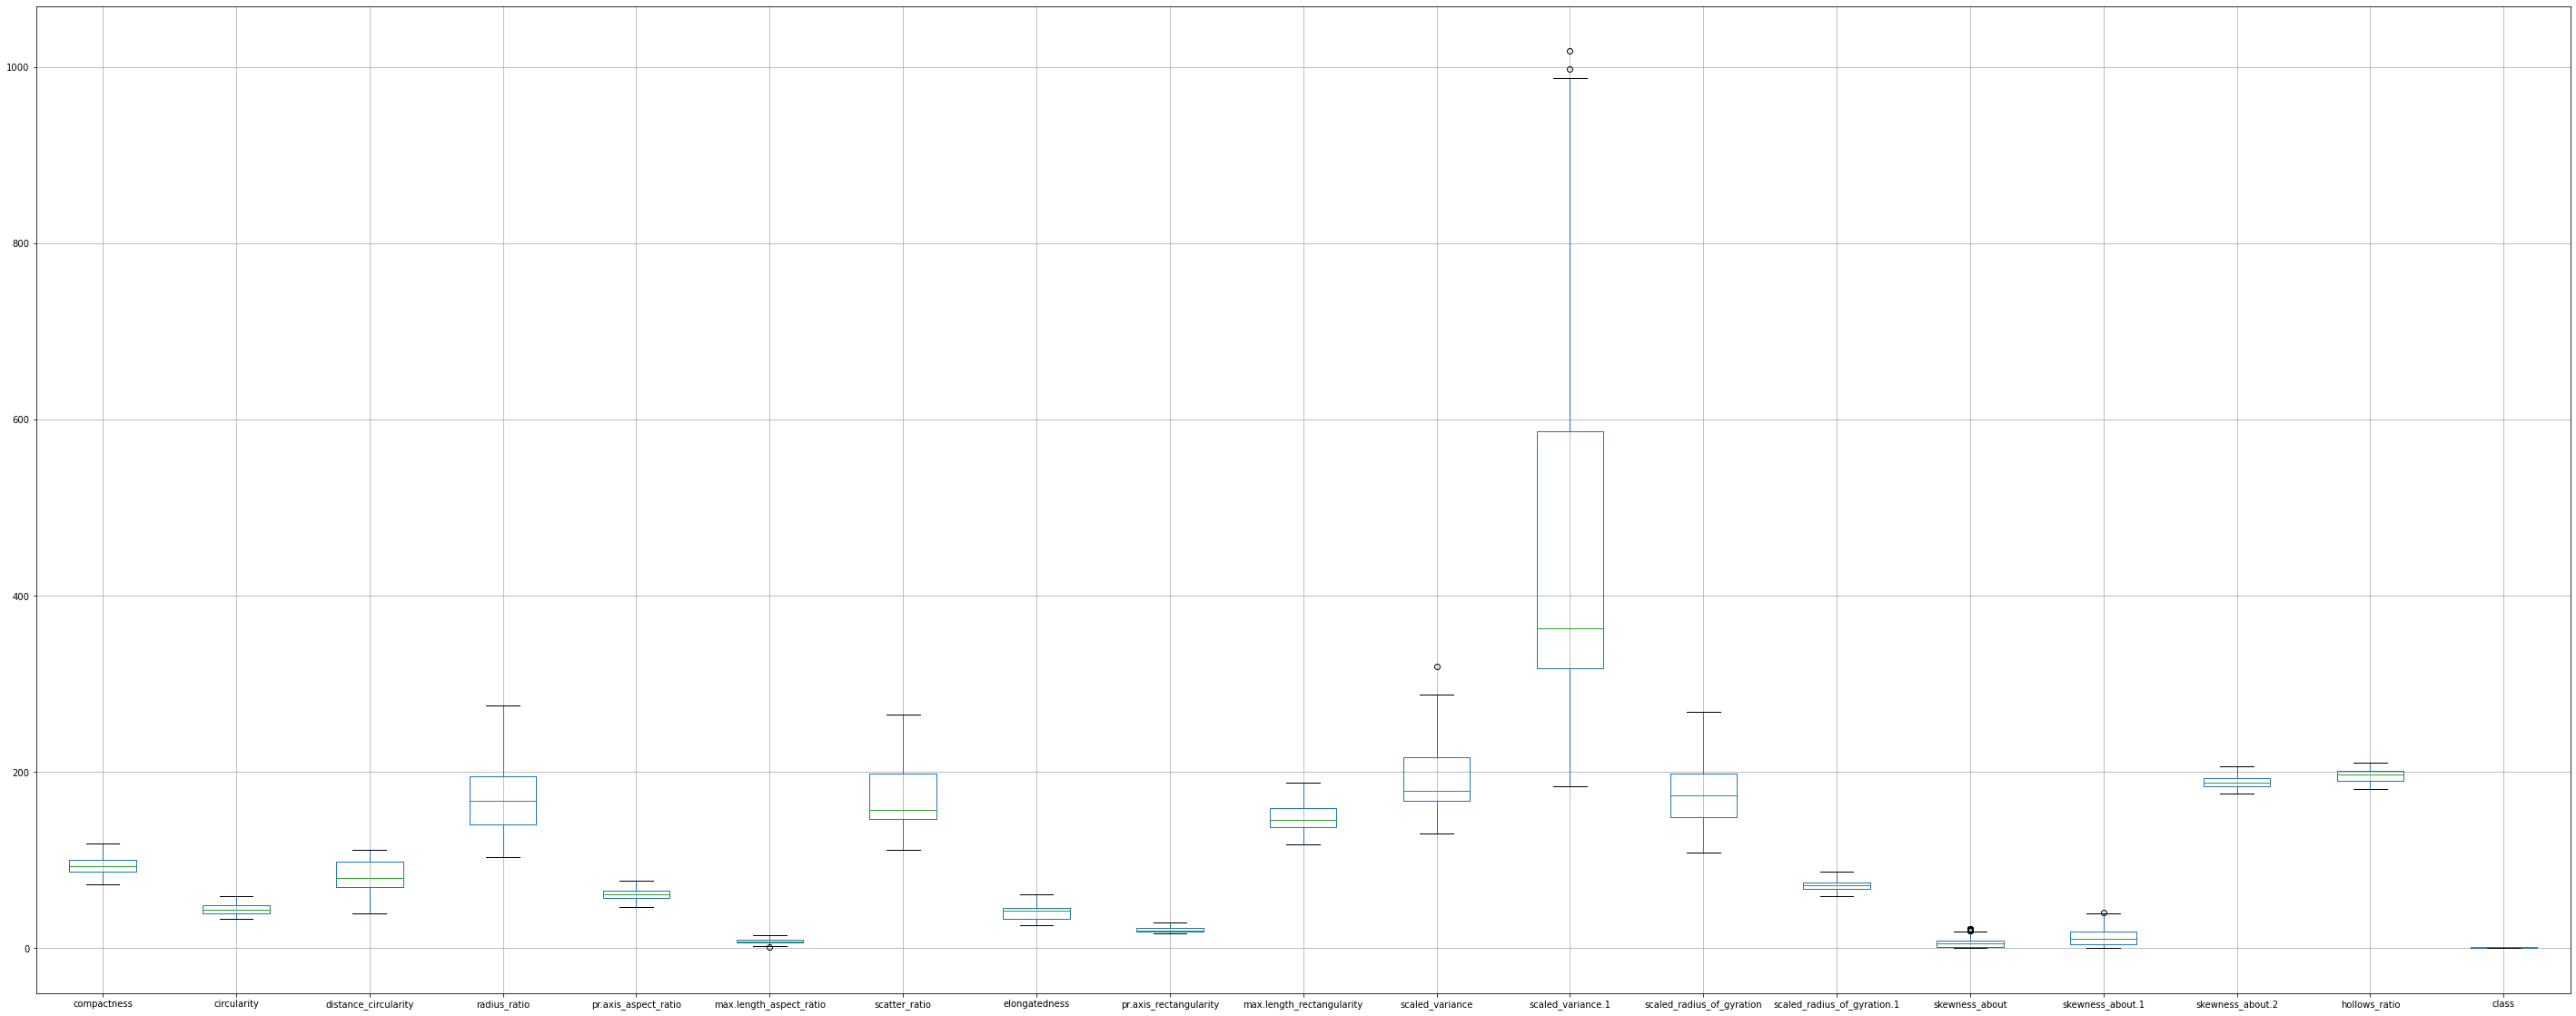

In [20]:
#Remove Using IQR
Q1 = data_withoutNull['radius_ratio'].quantile(0.25)
Q3 = data_withoutNull['radius_ratio'].quantile(0.75)
IQR = Q3 - Q1
for i in np.where(data_withoutNull['radius_ratio'] > Q3 + 1.5 * IQR):
    data_withoutNull['radius_ratio'].iloc[i] = Q3 + 1.5 * IQR
    
Q1 = data_withoutNull['pr.axis_aspect_ratio'].quantile(0.25)
Q3 = data_withoutNull['pr.axis_aspect_ratio'].quantile(0.75)
IQR = Q3 - Q1
for i in np.where(data_withoutNull['pr.axis_aspect_ratio'] > Q3 + 1.5 * IQR):
    data_withoutNull['pr.axis_aspect_ratio'].iloc[i] = Q3 + 1.5 * IQR

Q1 = data_withoutNull['max.length_aspect_ratio'].quantile(0.25)
Q3 = data_withoutNull['max.length_aspect_ratio'].quantile(0.75)
IQR = Q3 - Q1
for i in np.where(data_withoutNull['max.length_aspect_ratio'] > Q3 + 1.5 * IQR):
    data_withoutNull['max.length_aspect_ratio'].iloc[i] = Q3 + 1.5 * IQR

Q1 = data_withoutNull['scaled_radius_of_gyration.1'].quantile(0.25)
Q3 = data_withoutNull['scaled_radius_of_gyration.1'].quantile(0.75)
IQR = Q3 - Q1
for i in np.where(data_withoutNull['scaled_radius_of_gyration.1'] > Q3 + 1.5 * IQR):
    data_withoutNull['scaled_radius_of_gyration.1'].iloc[i] = Q3 + 1.5 * IQR

data_withoutNull.boxplot(return_type='axes',figsize=(50,20))

In [24]:
print(color.UNDERLINE+color.BOLD+'Before Imputing the null values::Do Null Values Exist?'+color.END)
print(data_withoutNull.isnull().values.any())
data_withoutNull.fillna(data_withoutNull.median(),axis=0,inplace=True)
print('')
print(color.UNDERLINE+color.BOLD+'After Dealing with the null Values::: Do Null Values Exist?'+color.END)
print(data_withoutNull.isnull().values.any())



Before Imputing the null values::Do Null Values Exist?
False

After Dealing with the null Values::: Do Null Values Exist?
False


#### Making copies of the original dataset

Here we are dividing dataset into two copies 

1. data_withoutPCA -- We'll perform without dimensionality reduction
2. data_withPCA - We'll use the technique PCA

For both of these we are removing null values and outliers

In [25]:
data_WithoutPCA=data_withoutNull.copy()
data_PCA=data_withoutNull.copy()

#### Applying SVC, K-Fold to Data


Splitting data into 70:30 and using random state as 1 
Here dropping only class (Target Variable)

In SVC we use gamma is a measure of influence of a data point. It is inverse of distance of influence. C is penalty of wrong classifications. 

In [40]:
def split_data_SVC(x_train, x_test, y_train, y_test):
    #SVC Model
    clf = svm.SVC(gamma=0.025, C=3) 
    clf.fit(x_train , y_train)
    y_pred = clf.predict(x_test)
    #Accuracy 
    print('Accuracy on test data is :',clf.score(x_test,y_test))
    #Confusion Matrix
    cm1=metrics.confusion_matrix(y_test, y_pred, labels=[0,1,2])
    model_cm1 = pd.DataFrame(cm1, index = [i for i in ["0","1","2"]],columns = [i for i in ["Predict 0","Predict 1","Predict 2"]])
    sns.heatmap(model_cm1, annot=True,fmt='g',cmap='twilight')
    return

def K_Fold(X,Y):
    num_folds = 50
    seed = 7
    kfold = KFold(n_splits=num_folds, random_state=seed)
    clf = svm.SVC(gamma=0.025, C=3)
    results = cross_val_score(clf, X, Y, cv=kfold)
    print(results)
    print("Accuracy in the K-Fold: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
    return



(846, 18)
(846,)
Accuracy on test data is : 0.968503937007874


F:\PGP-AIML\Python_Projects\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[0.23529412 0.52941176 0.41176471 0.47058824 0.47058824 0.47058824
 0.47058824 0.35294118 0.64705882 0.70588235 0.35294118 0.58823529
 0.47058824 0.47058824 0.47058824 0.58823529 0.35294118 0.29411765
 0.52941176 0.52941176 0.64705882 0.58823529 0.58823529 0.52941176
 0.64705882 0.64705882 0.41176471 0.58823529 0.64705882 0.76470588
 0.76470588 0.47058824 0.52941176 0.76470588 0.64705882 0.52941176
 0.58823529 0.58823529 0.64705882 0.52941176 0.41176471 0.64705882
 0.64705882 0.35294118 0.52941176 0.52941176 0.625      0.5625
 0.75       0.5       ]
Accuracy in the K-Fold: 54.169% (12.115%)


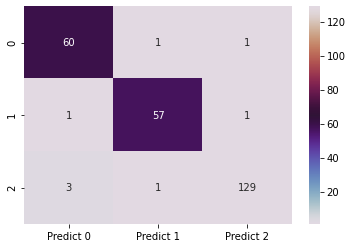

In [27]:
#Splitting Data Removing target variable class
X = data_WithoutPCA.drop(['class'],axis=1)     # Predictor feature columns (8 X m)
Y = data_WithoutPCA['class'] 
XScaled=X.apply(zscore)
print(X.shape)
print(Y.shape)
x_train, x_test, y_train, y_test = train_test_split(XScaled, Y, test_size=0.3, random_state=1)
split_data_SVC(x_train, x_test, y_train, y_test)
K_Fold(X,Y)

#### PCA (Principal Component Analysis)

In [35]:
#Splitting Data Removing target variable class
X_PCA = data_PCA.drop(['class'],axis=1)     # Predictor feature columns (8 X m)
Y_PCA = data_PCA['class'] 
XScaled_PCA=X_PCA.apply(zscore)
pca = PCA(n_components=18)
pca.fit(XScaled)

print('Eigen Values::')
print(pca.explained_variance_)

Eigen Values::
[9.68276111e+00 3.30405099e+00 1.19517618e+00 1.17070679e+00
 8.74029878e-01 7.43337653e-01 3.45666353e-01 2.20643665e-01
 1.37031376e-01 9.74225612e-02 6.30380167e-02 5.88873371e-02
 4.15658435e-02 3.12677027e-02 2.28775672e-02 1.97661853e-02
 1.01133951e-02 2.95915948e-03]


In [36]:
print('eigen vectors::')
print(pca.components_)

eigen vectors::
[[ 2.72623537e-01  2.88611489e-01  3.02697584e-01  2.67956754e-01
   9.60885976e-02  1.83949533e-01  3.11280060e-01 -3.09453319e-01
   3.08046497e-01  2.79468992e-01  3.00744400e-01  3.07449574e-01
   2.65136451e-01 -4.10518996e-02  4.16110300e-02  5.85241147e-02
   3.60688290e-02  8.25710732e-02]
 [-9.25478778e-02  1.29123497e-01 -5.13653219e-02 -1.94481855e-01
  -2.42184075e-01 -1.02573312e-01  7.19101177e-02 -9.37014245e-03
   8.42510105e-02  1.18993622e-01  7.36082040e-02  7.91657479e-02
   2.09494344e-01  5.00319565e-01 -4.15981707e-02 -9.85573852e-02
  -5.07435384e-01 -5.13596991e-01]
 [ 1.62811322e-02 -2.05111647e-01  9.37428699e-02 -3.56998811e-02
  -2.58715127e-01 -1.41240049e-01  1.21187377e-01 -8.48000853e-02
   1.25557126e-01 -2.03593159e-01  1.15244705e-01  1.24653208e-01
  -2.13142010e-01  1.53748030e-02 -3.81496067e-01  7.47971068e-01
  -4.43349709e-02 -1.32754373e-02]
 [-2.00198987e-01 -1.65770711e-02 -6.58574138e-02  2.81998999e-01
   6.04430855e-01 -5.

In [30]:
print('Variance Ratio:::')
print(pca.explained_variance_ratio_)

Variance Ratio:::
[5.37295321e-01 1.83341416e-01 6.63201915e-02 6.49623876e-02
 4.84998192e-02 4.12477224e-02 1.91809869e-02 1.22434921e-02
 7.60385558e-03 5.40596691e-03 3.49797243e-03 3.26765169e-03
 2.30648396e-03 1.73504129e-03 1.26947362e-03 1.09682339e-03
 5.61191152e-04 1.64203425e-04]


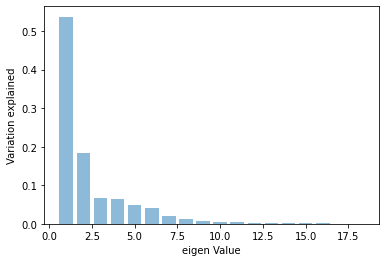

In [31]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

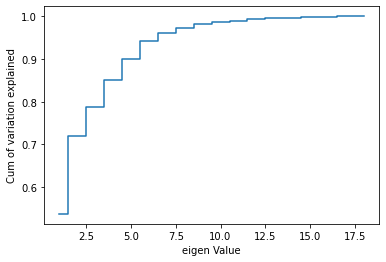

In [32]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

#### Observation:
As from above data we can see that almost 8 Dimensions cover 95% of the data. So in next steps we are going to take only these 8 Dimensions for further analysis

In [37]:
#use first 8 principal components
pca8 = PCA(n_components=8)
pca8.fit(XScaled_PCA)
print(pca8.explained_variance_ratio_)
Xpca8 = pca8.transform(XScaled_PCA)
Xpca8

[0.53729532 0.18334142 0.06632019 0.06496239 0.04849982 0.04124772
 0.01918099 0.01224349]


array([[ 0.53599764, -0.6187593 , -0.749057  , ...,  1.09965436,
        -0.60457694, -0.54387898],
       [-1.53010812, -0.38472425,  0.05000372, ...,  0.04169793,
         0.19880661,  0.14899669],
       [ 3.87017129,  0.19706759, -1.08524231, ...,  0.9463868 ,
         0.61405447,  0.30831019],
       ...,
       [ 5.04258074, -0.13840499, -0.82976623, ..., -0.75506476,
         0.76467076, -0.2761832 ],
       [-3.30529108, -1.05931944,  1.93847972, ..., -0.23451171,
        -0.32437252,  0.42825934],
       [-4.9387098 ,  0.42117636,  1.33210429, ..., -0.43490704,
        -0.34150968, -0.24632198]])

#### Applying the SVM and K-Fold for this PCA Component data

Accuracy on test data is : 0.9448818897637795


F:\PGP-AIML\Python_Projects\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[1.         0.82352941 1.         0.94117647 0.94117647 1.
 1.         0.94117647 1.         1.         0.94117647 1.
 0.88235294 0.88235294 1.         0.88235294 0.94117647 1.
 0.94117647 1.         0.94117647 1.         0.82352941 0.94117647
 1.         0.94117647 0.94117647 1.         0.94117647 1.
 0.88235294 0.94117647 0.88235294 0.94117647 0.94117647 0.76470588
 0.94117647 1.         0.88235294 0.94117647 0.88235294 1.
 1.         0.88235294 0.94117647 1.         0.9375     1.
 1.         0.9375    ]
Accuracy in the K-Fold: 94.691% (5.551%)


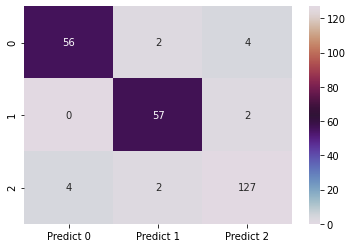

In [39]:
x_train_PCA, x_test_PCA, y_train_PCA, y_test_PCA = train_test_split(Xpca8, Y_PCA, test_size=0.3, random_state=1)
split_data_SVC(x_train_PCA, x_test_PCA, y_train_PCA, y_test_PCA)
#Here we are Keeping only 8 attributes and removing all for Cross Validation
K_Fold(Xpca8,Y_PCA)

##### Observation:

The Performance on the Test Dataset Increases when we did dimensionality reduction using PCA (Principal Component Analysis). Please find below observations

Comparision of the Scores : 
1. Accuracy scores : When we build Model on 18 Attributes the accuracy is 96% but when using PCA we reduced dimensions into 8 Attributes then only for these 8 attributes we can get 94% Accuracy on test data- So we can say PCA Performs well but the one disadvantage in PCA is  it is best for the prediction but not good for interpretation
2. Cross Validation drastic Increase from 54% from 94.691% - Cross Validation is nothing but to find the range estimates in which our model will performs in the production data - So PCA model represents the sample well in the production

Finally PCA Performs well where in real time we have to think about the model that performs well in the production data. So as per my analysis PCA Model performs best